In [64]:
import math
import time
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor
import matplotlib.pyplot as plt

In [65]:
PRIMES = [112272535095293] * 100

In [66]:
def isPrime(number):
    if number == 2:
        return True
    if number < 2 or number % 2 == 0:
        return False
    sqrt_n = int(math.floor(math.sqrt(number)))
    for i in range(3, sqrt_n + 1, 2):
        if number % i == 0:
            return False
    return True

In [67]:
def single_thread():
    for n in PRIMES:
        isPrime(n)

In [68]:
def multi_thread():
    with ThreadPoolExecutor() as pool:
        pool.map(isPrime, PRIMES)

In [69]:
def multi_process():
    with ProcessPoolExecutor() as pool:
        pool.map(isPrime, PRIMES)

In [76]:
start = time.time()
single_thread()
end = time.time()
single_thread_time = end - start

In [77]:
start = time.time()
multi_thread()
end = time.time()
multi_thread_time = end - start

In [78]:
start = time.time()
multi_process()
end = time.time()
multi_process_time = end - start

In [79]:
data = [single_thread_time, multi_thread_time, multi_process_time]

In [80]:
data

[33.94530129432678, 33.03148055076599, 0.31258273124694824]

Text(0.5, 1.0, 'Run time comparison')

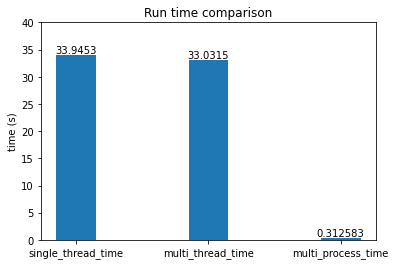

In [81]:
x = ['single_thread_time', 'multi_thread_time', 'multi_process_time']
bars = plt.bar(x, data, width=0.3)
plt.ylabel("time (s)")
plt.ylim((0, 40))
plt.bar_label(bars, label_type='edge')
plt.title("Run time comparison")